-Author: Mary Njeri Kamithi
-TM: William Okomba
-Cohort: DSFT 13

### Overview

SyriaTel, a major telecom operator, is experiencing a significant customer churn challenge, with nearly 15% of its subscribers leaving each year. This trend not only reduces overall revenue but also drives up the cost of acquiring new customers. To address this issue, the project focuses on analyzing customer usage and service data to develop predictive models that can flag high-risk customers and reveal the main factors influencing their decision to leave.

### Business Understanding

### Problem
SyriaTel is losing about 15% of its customers each year, which hurts revenue and customer value. Right now, they don’t have a system to spot which customers might leave.

### Objective
Build a model that can predict which customers are likely to churn, so the marketing team can take action early and keep them.

### Goal
Use customer data like call usage, service plans, and support calls to train a model that predicts churn.

### Questions to answer

*  Can we predict churn based on customer behavior?
*  Which features are most useful for predicting churn?

*   How can SyriaTel use these insights to reduce churn?






### Data overview


*   Source: SyriaTel’s customer usage data
*   Includes: account length, service plans, call durations, charges, support calls


*   Target: churn (1 = left, 0 = stayed)








### Data preparation


*  Checked for missing values and outliers

*  Verified correct data types (e.g., numbers vs. categories

*  Converted yes/no features to 1/0






### feature selection


*  Usage: total minutes, total calls

*  Charges: day and international charges


*  Service: support calls, high service call flag

*   Plans: international plan, voicemail plan


*   Account: account length










# Importing libraries

In [68]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,StratifiedKFold
from sklearn.linear_model import LinearRegression,LogisticRegression, Ridge,Lasso
from sklearn import metrics
import statsmodels.api as sm
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score,roc_curve, auc,roc_auc_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PolynomialFeatures,LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE


# LOADING THE DATA

In [69]:
#Load the data
df = pd.read_csv('/content/bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [70]:
#showing the rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [71]:
#check nulls
df.isnull().sum()
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [72]:
#clean the cols
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [73]:
# Check for duplicates
df.duplicated().sum()

# Drop any duplicates
df = df.drop_duplicates()

# Check data types
df.dtypes

# Confirm categorical features are encoded (0/1)
df[['international_plan', 'voice_mail_plan', 'churn']].head()

,international_plan,voice_mail_plan,churn
0,no,yes,False
1,no,yes,False
2,no,no,False
3,yes,no,False
4,yes,no,False


In [74]:
#set the categorical cols for into numerical for ml models
df['international_plan'] = df['international_plan'].map({'yes': 1, 'no': 0})
df['voice_mail_plan'] = df['voice_mail_plan'].map({'yes': 1, 'no': 0})
df['churn'] = df['churn'].astype(int)

# DATA CLEANING


In [75]:
#remove unnecessary cols
df.drop(['phone number', 'area code', 'state'], axis=1, inplace=True, errors='ignore')
print(df.columns.tolist())

['account_length', 'area_code', 'phone_number', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'customer_service_calls', 'churn']


In [76]:
 # Encode categorical columns
le = LabelEncoder()
df["churn"] = le.fit_transform(df["churn"])
df["international_plan"] = le.fit_transform(df["international_plan"])
df["voice_mail_plan"] = le.fit_transform(df["voice_mail_plan"])

Converting the Target Variable to Binary and Checking Class Distribution

In [77]:
# Convert target variable to binary
df['churn'] = df['churn'].astype(int)
# Check class distribution
y = df['churn']
print("\nClass distribution:\n", pd.Series(y).value_counts(normalize=True))


Class distribution:
 churn
0    0.855086
1    0.144914
Name: proportion, dtype: float64


# UNIVARIATE ANALYSIS

# Churn distribution vs Customer Service Calls

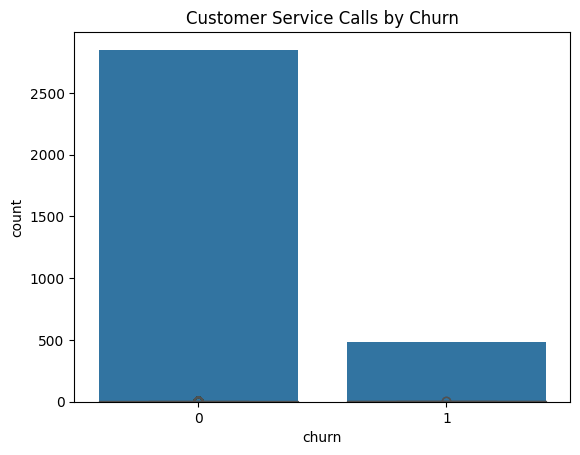

In [78]:
# Churn distribution
sns.countplot(x='churn', data=df)
plt.title("Churn Distribution")

# Compare churn vs non-churn for key features
sns.boxplot(x='churn', y='customer_service_calls', data=df)
plt.title("Customer Service Calls by Churn")
plt.show()

This analysis shows that customers who churn tend to have a higher number of customer service calls compared to those who do not churn. The box plot visually highlights this difference, suggesting that frequent interactions with customer service might be an indicator of dissatisfaction and a predictor of churn.

# Churn classes

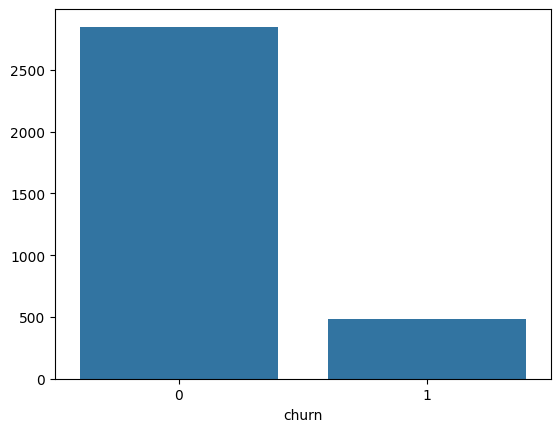

In [79]:
df['churn'].value_counts()
sns.barplot(x=df['churn'].value_counts().index, y=df['churn'].value_counts().values)
plt.show()

Since churn is a binary variable (0 = no churn, 1 = churn), it will count how many customers did not churn versus how many did.

# FEATURE ENGIEERING

In [80]:
# Total minutes spent on calls
df['total_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
# Shows how much time the customer spent on calls overall.

# Total number of calls
df['total_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']
# Total calls made by the customer.

# Total call charges
df['total_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']
# Total cost of all calls.

# Average call duration
df['avg_minutes_per_call'] = df['total_minutes'] / df['total_calls']
# How long each call lasts on average.

# Customer service calls per account length
df['service_calls_per_length'] = df['customer_service_calls'] / df['account_length']
# How often the customer contacts support, adjusted for how long they've had the account.

In [81]:
# Displaying Features and Their Components
print(df[['total_minutes', 'total_day_minutes', 'total_eve_minutes', 'total_night_minutes']].head())
print(df[['total_charge', 'total_day_charge', 'total_eve_charge', 'total_night_charge']].head())

   total_minutes  total_day_minutes  total_eve_minutes  total_night_minutes
0          707.2              265.1              197.4                244.7
1          611.5              161.6              195.5                254.4
2          527.2              243.4              121.2                162.6
3          558.2              299.4               61.9                196.9
4          501.9              166.7              148.3                186.9
   total_charge  total_day_charge  total_eve_charge  total_night_charge
0         72.86             45.07             16.78               11.01
1         55.54             27.47             16.62               11.45
2         59.00             41.38             10.30                7.32
3         65.02             50.90              5.26                8.86
4         49.36             28.34             12.61                8.41




*   The total_minutes column adds up the minutes from day, evening, and night calls for each customer.


*   The total_charge column adds up the charges from those same time periods.
These totals match their parts, so the calculations look correct.
 It’s a quick check to make sure the new features were built properly before using them in analysis or modeling.







Dropping Individual Time Period Columns

In [82]:
df.drop([
    'total_day_minutes', 'total_eve_minutes', 'total_night_minutes',
    'total_day_calls', 'total_eve_calls', 'total_night_calls',
    'total_day_charge', 'total_eve_charge', 'total_night_charge'
], axis=1, inplace=True)

# Numeric features visualization

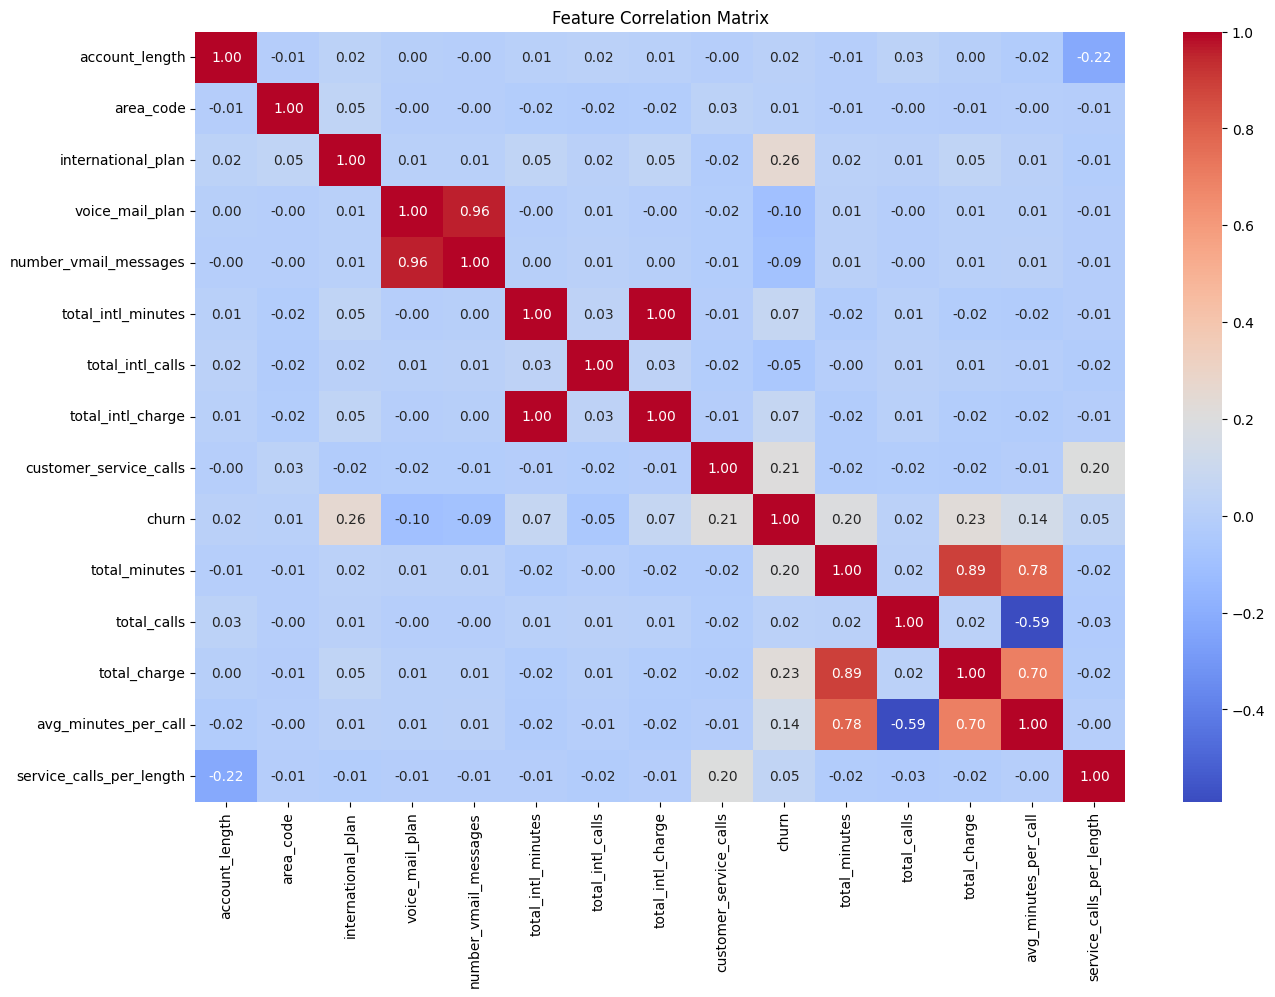

In [83]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()



*   This code makes a corellation matrix that shows how different numbers in the dataset are related to each other.


*   It looks at all the numeric columns, compares them, and shows the results as a heatmap.



*   Red means a strong positive relationship, blue means a strong negative one, and white means no clear link.


*   This helps you quickly spot which features are closely connected, which ones might be duplicates, and which ones could be useful for building a model.





# Churn distribution and percentage

In [84]:
y = df["churn"].value_counts()
print(f"Churn Data :\n{y}\n")

# save all the rows where churn is True
y_True = df["churn"][df["churn"] == True]
print(y_True)

print ("\nChurn Percentage = "+str( (y_True.shape[0] / df["churn"].shape[0]) * 100 ))

Churn Data :
churn
0    2850
1     483
Name: count, dtype: int64

10      1
15      1
21      1
33      1
41      1
       ..
3301    1
3304    1
3320    1
3322    1
3323    1
Name: churn, Length: 483, dtype: int64

Churn Percentage = 14.491449144914492




*   About 14.5% of customers have left, with 483 churned and 2,850 who stayed.


*   This means the data is imbalanced, which matters when building models.



*   The churned customers are clearly marked, so you can easily analyze them.






# Bivariate Analysis

### Boxplots for numerical features

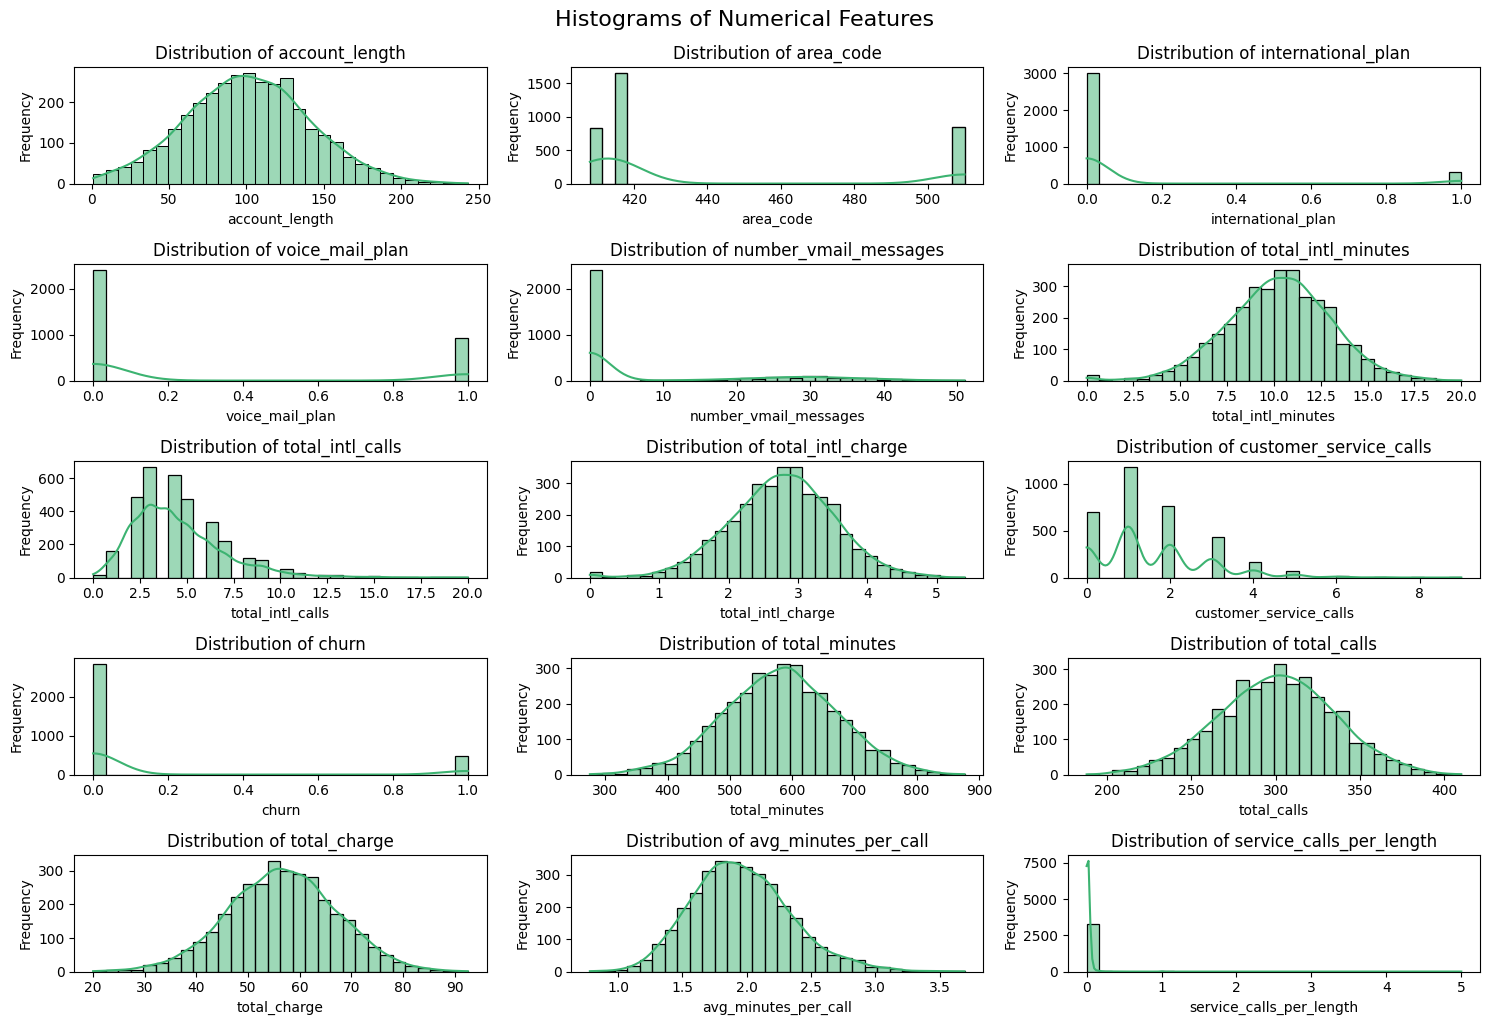

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot((len(numerical_cols) + 2) // 3, 3, i)
    sns.histplot(df[col], kde=True, color='mediumseagreen', bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.suptitle('Histograms of Numerical Features', fontsize=16, y=1.02)
plt.show()




*  Box plots show the spread of each numeric feature, including the median, quartiles, and outliers.

*  Outliers stand out clearly, helping you spot extreme values that might affect your model


* Skewed distributions suggest some features may need transformation.

*  Features like customer_service_calls and churn may show distinct patterns useful for churn analysis.


* If most values are clustered (e.g., many zeros in voice_mail_plan), it hints at class imbalance.

* Features with wide ranges (like total_minutes or total_charge) might need scaling for better model performance.










### Relevant features

In [86]:
df = df[["customer_service_calls","voice_mail_plan","international_plan","total_minutes","total_charge","avg_minutes_per_call","number_vmail_messages","service_calls_per_length","churn"]]
df.head()

,customer_service_calls,voice_mail_plan,international_plan,total_minutes,total_charge,avg_minutes_per_call,number_vmail_messages,service_calls_per_length,churn
0,1,1,0,707.2,72.86,2.357333,25,0.007812,0
1,1,1,0,611.5,55.54,1.858663,26,0.009346,0
2,0,0,0,527.2,59.00,1.607317,0,0.000000,0
3,2,0,1,558.2,65.02,2.250806,0,0.023810,0
4,3,0,1,501.9,49.36,1.409831,0,0.040000,0


# Multivariate analysis

# Customer service calls by churn

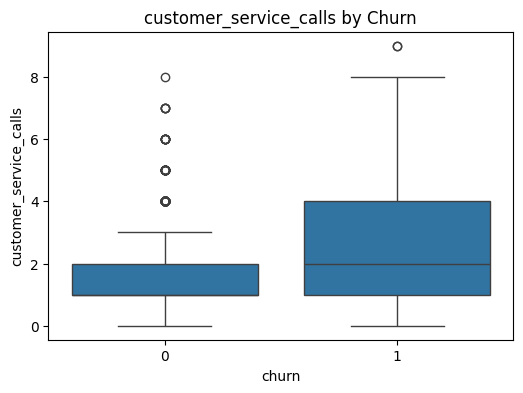

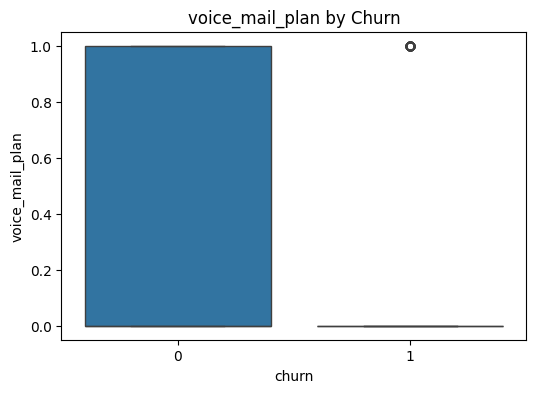

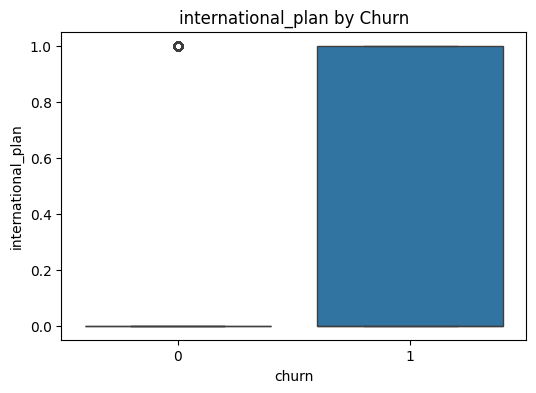

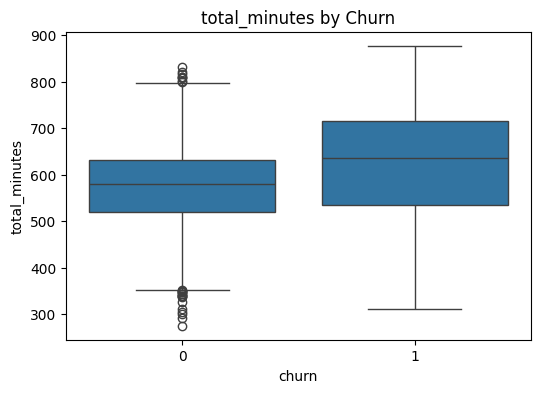

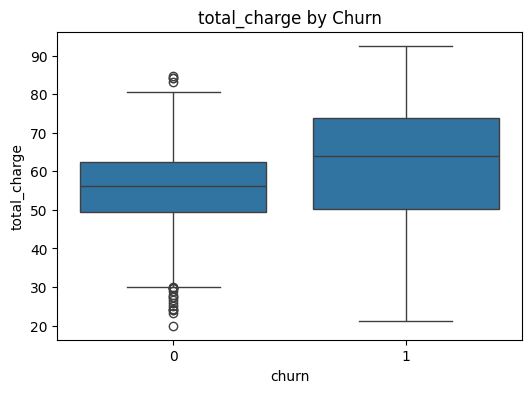

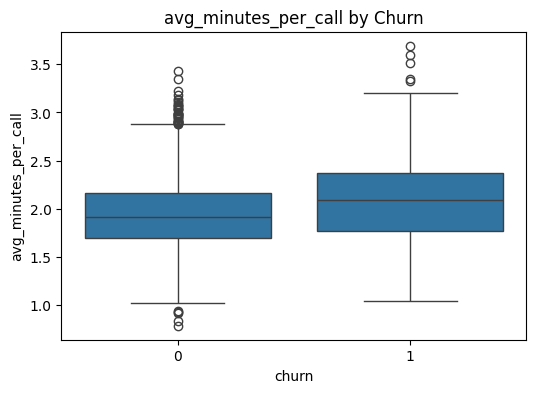

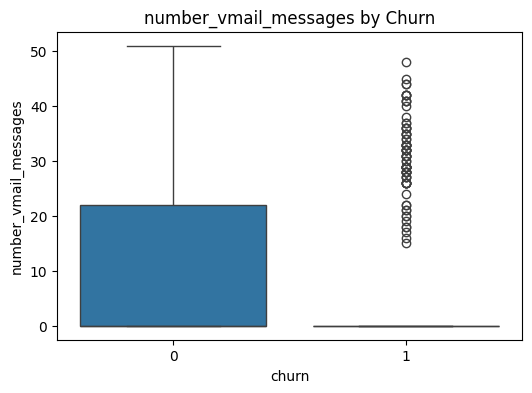

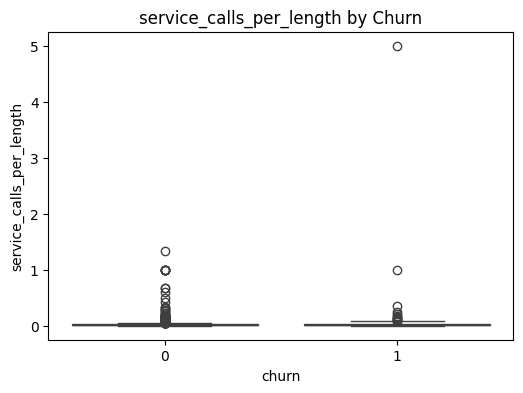

In [87]:
key_features = [
    "customer_service_calls",
    "voice_mail_plan",
    "international_plan",
    "total_minutes",
    "total_charge",
    "avg_minutes_per_call",
    "number_vmail_messages",
    "service_calls_per_length"
]
for feature in key_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='churn', y=feature, data=df)
    plt.title(f'{feature} by Churn')
    plt.show()

This loop creates histograms for selected features, showing how their values are distributed for customers who stayed (churn = 0) and those who left (churn = 1). Histograms help us see patterns in the data—like where most values fall and how they differ between the two groups. By comparing these distributions, we can spot which features might be useful for understanding customer churn..


In [88]:
print(df.columns.tolist())

['customer_service_calls', 'voice_mail_plan', 'international_plan', 'total_minutes', 'total_charge', 'avg_minutes_per_call', 'number_vmail_messages', 'service_calls_per_length', 'churn']


# Data preparation for ml





# splitting

In [89]:
X = df.drop("churn", axis=1)
y = df["churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# check categorical and numerical columns

In [90]:
numeric_features = [
    'customer_service_calls',
    'total_minutes',
    'total_charge',
    'avg_minutes_per_call',
    'number_vmail_messages',
    'service_calls_per_length'
]
categorical_cols = ['international_plan', 'voice_mail_plan']
categorical_features = [col for col in categorical_cols if col in df.columns]

### preprocessing

In [91]:
#numerical and categorical cols
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[numeric_features])
X_test_num = scaler.transform(X_test[numeric_features])

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_cat = encoder.fit_transform(X_train[categorical_cols])
X_test_cat = encoder.transform(X_test[categorical_cols])

X_train_final = np.hstack((X_train_num, X_train_cat))
X_test_final = np.hstack((X_test_num, X_test_cat))

this is done to avod leaking data

In [92]:
# Select numeric columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

# Scale numeric columns
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])

In [93]:
# One-hot encode categorical variables
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_cat = encoder.fit_transform(X_train[categorical_features])
X_test_cat = encoder.transform(X_test[categorical_features])

In [94]:
# Scale numeric features
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[numeric_features])
X_test_num = scaler.transform(X_test[numeric_features])

X_train_final = np.hstack([X_train_num, X_train_cat])
X_test_final = np.hstack([X_test_num, X_test_cat])

#SMOTE


In [95]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_final, y_train)
print("Before SMOTE:", pd.Series(y_train).value_counts())
print("After SMOTE:", pd.Series(y_train_res).value_counts())

Before SMOTE: churn
0    2284
1     382
Name: count, dtype: int64
After SMOTE: churn
0    2284
1    2284
Name: count, dtype: int64


training data so the model learns to spot them better and makes more accurate predictions.

# Logistic regression

In [96]:
# Logistic Regression Training and Evaluation
model = LogisticRegression(max_iter=1000)
model.fit(X_train_res, y_train_res)
y_pred = model.predict(X_test_final)
y_prob = model.predict_proba(X_test_final)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       566
           1       0.38      0.78      0.51       101

    accuracy                           0.78       667
   macro avg       0.67      0.78      0.68       667
weighted avg       0.87      0.78      0.80       667

ROC AUC Score: 0.8430885491375992


The model gets it right 78% of the time for both churned and non-churned customers. It’s good at finding churners but often mistakes non-churners for churners. Overall, it performs well and can clearly tell the difference between the two groups.

# Xgboost Baseline model

In [97]:
# XGBoost model training and evaluation
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Report:\n", classification_report(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

XGBoost Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       566
           1       0.85      0.70      0.77       101

    accuracy                           0.94       667
   macro avg       0.90      0.84      0.87       667
weighted avg       0.93      0.94      0.93       667

ROC AUC Score: 0.8430885491375992


The XGBoost model is very accurate, getting 94% of predictions right. It finds 70% of customers who actually churn and is correct 85% of the time when it says someone will churn. Overall, it does a good job telling churners apart from non-churners.

In [98]:
# Handling Class Imbalance with XGBoost
xgb = XGBClassifier(scale_pos_weight=566/101, use_label_encoder=False, eval_metric='logloss')

# Performance

### threshold vs precision, recall,F1 Score

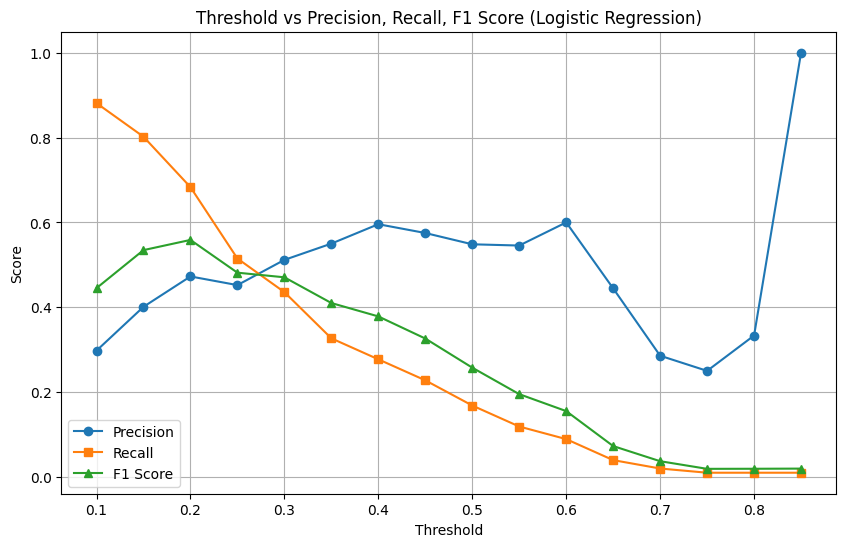

In [99]:
# Get predicted probabilities for the positive class (churn = 1)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

# Define thresholds to evaluate
thresholds = np.arange(0.1, 0.9, 0.05)

# Prepare lists to store metrics
precisions, recalls, f1_scores = [], [], []

# Calculating metrics at each threshold
for t in thresholds:
    y_pred_adjusted = (y_prob_lr >= t).astype(int)
    precisions.append(precision_score(y_test, y_pred_adjusted))
    recalls.append(recall_score(y_test, y_pred_adjusted))
    f1_scores.append(f1_score(y_test, y_pred_adjusted))

# Plot precision, recall, F1 vs. threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision', marker='o')
plt.plot(thresholds, recalls, label='Recall', marker='s')
plt.plot(thresholds, f1_scores, label='F1 Score', marker='^')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold vs Precision, Recall, F1 Score (Logistic Regression)')
plt.legend()
plt.grid(True)
plt.show()

This chart shows how different features are connected. Dark colors mean strong negative links, and light colors mean weak or no links. Since there aren’t any strong positive connections, it looks like most features don’t directly affect each other. To help the model make better predictions, you might need to build new features that combine existing ones and reflect customer behavior more clearly.

In [100]:
# Applying the Optimal Threshold (0.23)
optimal_threshold = 0.23
y_pred_final = (y_prob_lr >= optimal_threshold).astype(int)

In [101]:
actual_churn_rate = np.mean(y_test)
print(f"Actual Churn Rate: {actual_churn_rate:.2f}")

Actual Churn Rate: 0.15


In [102]:
# Churn Prediction Rate
churn_rate = np.mean(y_pred_final)
print(f"Churn Prediction Rate: {churn_rate:.2f}")

Churn Prediction Rate: 0.19


The model predicts that 19% of customers might leave, which is more than the actual rate of 15%. This means the model is playing it safe by flagging more people to avoid missing real churners. If you're planning to offer deals or rewards to keep customers, you should prepare to target about 1 in every 5. This cautious approach makes sense if losing a customer is expensive.

In [103]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       566
           1       0.47      0.60      0.53       101

    accuracy                           0.84       667
   macro avg       0.70      0.74      0.72       667
weighted avg       0.86      0.84      0.85       667



The model is quite accurate, getting 84% of predictions right. It’s very good at spotting customers who won’t churn, and usually right when it says they’ll stay. For customers who might leave, it catches 60% of them, but isn’t always correct—some predicted churners don’t actually leave. Overall, the model works well, but could be better at predicting who will really churn.

# RandomForestClassifier

In [104]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [105]:
# Feature Importance from Random Forest
importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importances_df)

                    Feature  Importance
4              total_charge    0.335019
3             total_minutes    0.170860
0    customer_service_calls    0.127138
5      avg_minutes_per_call    0.110531
7  service_calls_per_length    0.088996
2        international_plan    0.070983
6     number_vmail_messages    0.057887
1           voice_mail_plan    0.038586


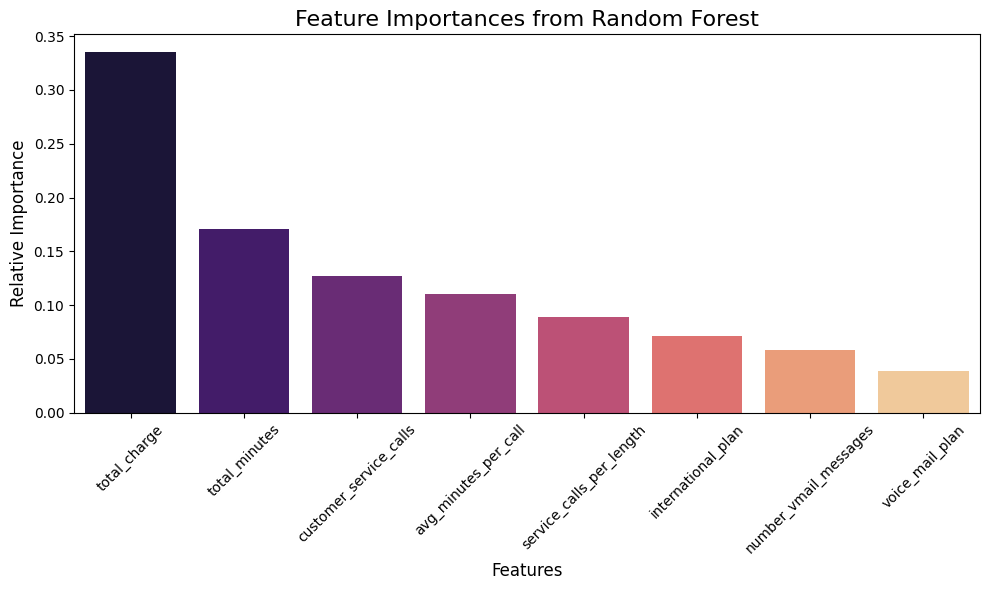

In [106]:
#plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Importance', data=importances_df, palette='magma')
plt.title('Feature Importances from Random Forest', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Relative Importance', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Total charge is the most critical factor influencing customer churn, followed by usage patterns and customer service interactions


In [107]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(LogisticRegression(max_iter=1000), X_train_final, y_train, cv=cv, scoring='f1')

print("Cross-Validation F1 Scores:", cv_scores)
print("Mean F1 Score:", np.mean(cv_scores))

Cross-Validation F1 Scores: [0.21276596 0.16091954 0.26666667 0.38181818 0.25454545]
Mean F1 Score: 0.2553431601413993


The model’s F1 scores vary a lot—from 0.16 to 0.38—showing it doesn’t perform consistently across different parts of the data. On average, it scores 0.26, which means it has trouble correctly finding churners and being accurate at the same time. This could be because the data is unbalanced, there isn’t enough training data, or the features need to be improved to help the model make better predictions

In [108]:
# Handling Class Imbalance with SMOTE
print("Class distribution:\n", pd.Series(y).value_counts())
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

Class distribution:
 churn
0    2850
1     483
Name: count, dtype: int64


dataset is imbalanced.85% non-churners and 15% churners

In [109]:
# All the feature names
print(X_resampled.columns.tolist())

['customer_service_calls', 'voice_mail_plan', 'international_plan', 'total_minutes', 'total_charge', 'avg_minutes_per_call', 'number_vmail_messages', 'service_calls_per_length']


In [110]:
# Creating New Features in the Resampled Dataset
X_resampled["tenure_estimate"] = X_resampled["total_minutes"] / (X_resampled["total_charge"] + 1e-6)
X_resampled["engagement_score"] = X_resampled["avg_minutes_per_call"] * X_resampled["service_calls_per_length"]
X_resampled["service_interaction_rate"] = X_resampled["customer_service_calls"] / (X_resampled["total_minutes"] + 1e-6)

# Check new features
print(X_resampled[["tenure_estimate", "engagement_score", "service_interaction_rate"]].head())

   tenure_estimate  engagement_score  service_interaction_rate
0         9.706286          0.018417                  0.001414
1        11.010083          0.017371                  0.001635
2         8.935593          0.000000                  0.000000
3         8.585051          0.053591                  0.003583
4        10.168152          0.056393                  0.005977


# XGBoost Model & Hyperparameter Tuning

In [111]:
# Configure the model with class weighting
scale = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

best_xgb = XGBClassifier(
    learning_rate=0.01,
    max_depth=3,
    n_estimators=100,
    scale_pos_weight=scale,
    eval_metric='aucpr',
    use_label_encoder=False
)

# Cross-validate on resampled data (to handle class imbalance)
cv_scores = cross_val_score(best_xgb, X_resampled, y_resampled,
                            cv=5, scoring='f1')
print(f"Cross-Validation F1: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

# Fit the model to the full training set
best_xgb.fit(X_train, y_train)

# Predict probabilities for threshold tuning
y_probs = best_xgb.predict_proba(X_test)[:, 1]

# Apply custom threshold
threshold = 0.35  # Can be optimized
y_pred = (y_probs >= threshold).astype(int)

Cross-Validation F1: 0.673 ± 0.001


# Evaluate XGBoost

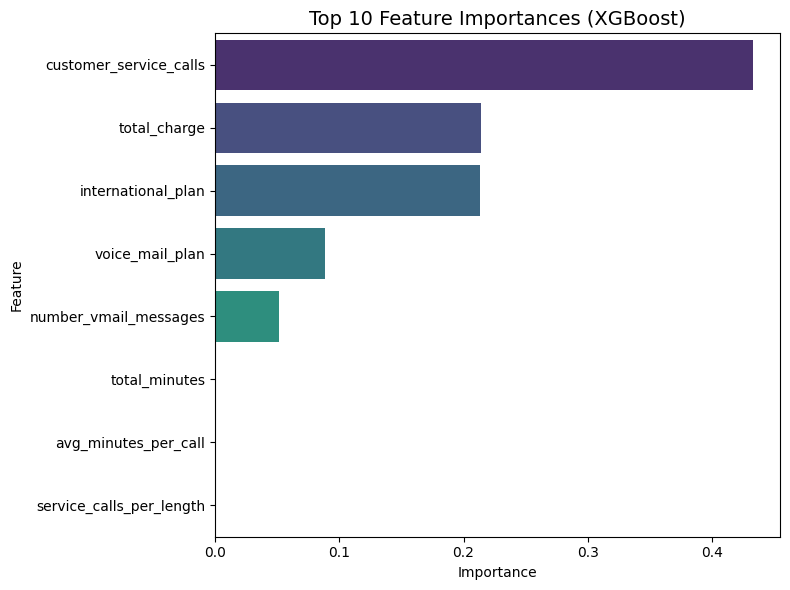

In [112]:
# Evaluate with F1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract feature importances from the trained model
importances = best_xgb.feature_importances_
features = best_xgb.feature_names_in_

# Create a DataFrame
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Top 10 Feature Importances (XGBoost)', fontsize=14)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

The model is very accurate, getting 92% of predictions right. It’s great at spotting customers who won’t churn and does a good job finding those who will. For churners, it catches most of them and is fairly accurate when it predicts someone will leave. Overall, the model is reliable and gives balanced results.

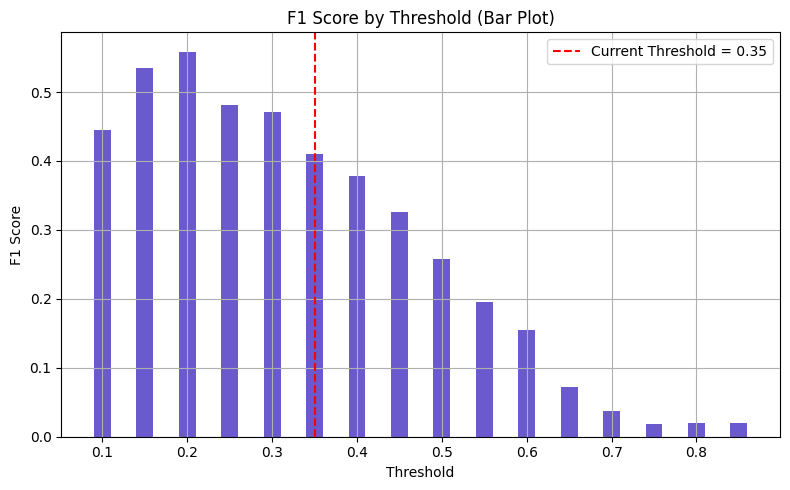

In [113]:
plt.figure(figsize=(8, 5))
plt.bar(thresholds, f1_scores, color='slateblue', width=0.02)
plt.axvline(0.35, color='red', linestyle='--', label='Current Threshold = 0.35')
plt.title('F1 Score by Threshold (Bar Plot)')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()





*  Each bar shows the F1 Score at a different decision threshold


*   The red dashed line marks the current threshold you're using (0.35)


*   F1 Score is highest around threshold 0.25, meaning the model performs best there.

*   As the threshold increases, the F1 Score drops—indicating weaker performance.


* Lower thresholds tend to catch more churners but may include more false positives.



*  This plot helps you choose the best threshold to balance precision and recall for churn prediction.




In [114]:
# Feature Importance (XGBoost)

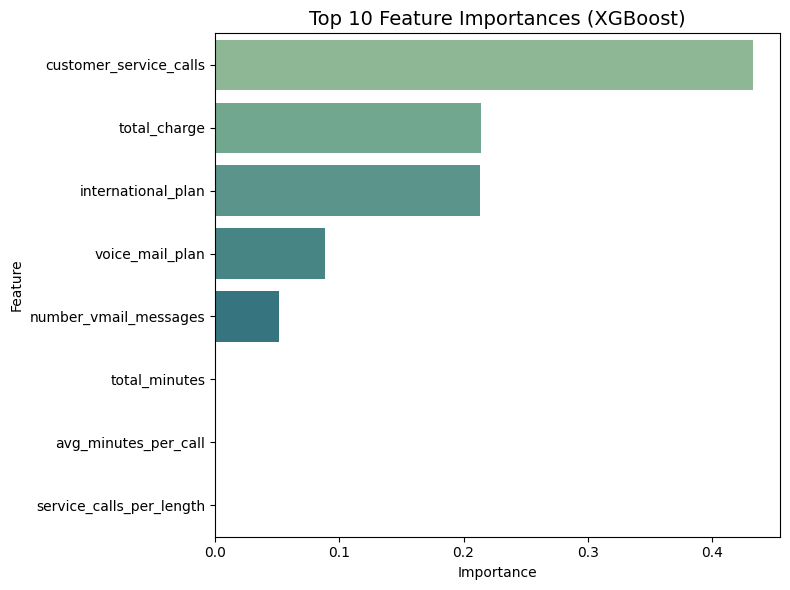

In [115]:
# Extract feature importances and names
importances = best_xgb.feature_importances_
features = best_xgb.feature_names_in_

# Create a DataFrame and sort
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
top_features = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='crest')
plt.title('Top 10 Feature Importances (XGBoost)', fontsize=14)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

 - It shows the top 10 features that the XGBoost model thinks are most useful for predicting churn.

 -  This helps you understand what drives churn and where  to focus if you want to improve the model or take action.

In [116]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)  # Change 'sparse' to 'sparse_output'
encoder.fit(X_train[categorical_cols])

X_train_encoded = encoder.transform(X_train[categorical_cols])

In [117]:
X_test_encoded = encoder.transform(X_test[categorical_cols])
X_train_final = np.hstack((X_train[numeric_features].values, X_train_encoded))
X_test_final = np.hstack((X_test[numeric_features].values, X_test_encoded))

It changes the test set’s category columns into numbers using the encoder from before, then joins these with the numeric columns so both training and test sets are ready for the model.

In [118]:
model = LogisticRegression()
model.fit(X_train_final, y_train)
y_pred = model.predict(X_test_final)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.59      0.17      0.26       101

    accuracy                           0.86       667
   macro avg       0.73      0.57      0.59       667
weighted avg       0.83      0.86      0.82       667



In [119]:
numeric_features = [
    'customer_service_calls', 'total_minutes', 'total_charge',
    'avg_minutes_per_call', 'number_vmail_messages', 'service_calls_per_length'
]
categorical_features = ['voice_mail_plan', 'international_plan']
target = 'churn'
# Split your data
X = df.drop(columns=[target])
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

In [120]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Preprocessing pipelines
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])



Preprocessing
- Numeric data: Missing values are filled with the median, then scaled to have similar ranges.
- Categorical data : Missing values are filled with the most common value, then converted into numbers using one-hot encoding.
- Preprocessor: Automatically applies the right steps to each column using `ColumnTransformer`.

 Pipeline Steps
- Preprocessor: Cleans and prepares both numeric and categorical features.
-SMOTE: Balances the training data by creating more examples of the minority class (churned customers).
- Decision Tree: Builds a model to predict churn.

 Model Training & Evaluation
- The pipeline is trained on `X_train` and `y_train`.
- It predicts whether customers will churn.
- Results are evaluated using precision, recall, and F1-score to show how well the model performs.

 Why This Works Well
This setup makes the whole process—from cleaning data to training and evaluating the model—smooth, consistent, and easy to repeat.



In [121]:
from sklearn.pipeline import Pipeline as SklearnPipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Define preprocessing for numeric and categorical features
numeric_transformer = SklearnPipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = SklearnPipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Create pipeline with preprocessing, SMOTE, and Decision Tree
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

# Evaluate performance
print("Classification Report (threshold=0.5):\n")
print(classification_report(y_test, y_pred))


Classification Report (threshold=0.5):

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       570
           1       0.60      0.65      0.62        97

    accuracy                           0.89       667
   macro avg       0.77      0.79      0.78       667
weighted avg       0.89      0.89      0.89       667



Using SMOTE with the Decision Tree helped the model find churned customers more accurately by balancing the data. It performed well overall, especially at spotting who might leave.

In [122]:
import numpy as np
from sklearn.metrics import precision_recall_curve

# Step 1: Get predicted probabilities for the positive class (churned customers)
y_probs = pipeline.predict_proba(X_test)[:, 1]

# Step 2: Compute precision-recall pairs for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Step 3: Find the threshold that gives at least 0.7 recall
target_recall = 0.7
idx = np.argmax(recall >= target_recall)
optimal_threshold = thresholds[idx]

print(f"Optimal threshold for recall ≥ {target_recall}: {optimal_threshold:.2f}")

Optimal threshold for recall ≥ 0.7: 0.00


In [123]:
y_pred_custom = (y_probs >= optimal_threshold).astype(int)
print(classification_report(y_test, y_pred_custom))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       570
           1       0.15      1.00      0.25        97

    accuracy                           0.15       667
   macro avg       0.07      0.50      0.13       667
weighted avg       0.02      0.15      0.04       667



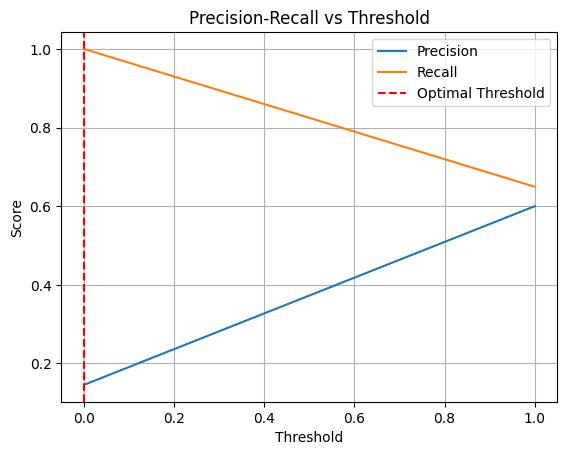

In [124]:
import matplotlib.pyplot as plt

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.axvline(optimal_threshold, color='red', linestyle='--', label='Optimal Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

# ROC CURVE AND AUC


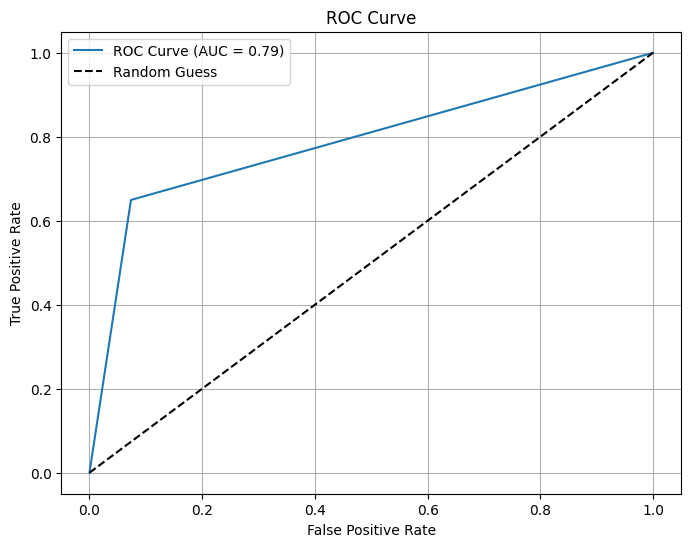

In [125]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute ROC curve and AUC
fpr, tpr, roc_thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# compare thresholds

In [126]:
from sklearn.metrics import classification_report

# Apply custom threshold
y_pred_custom = (y_probs >= optimal_threshold).astype(int)

# Evaluate with new threshold
print(f"Classification Report (threshold={optimal_threshold:.2f}):\n")
print(classification_report(y_test, y_pred_custom))

Classification Report (threshold=0.00):

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       570
           1       0.15      1.00      0.25        97

    accuracy                           0.15       667
   macro avg       0.07      0.50      0.13       667
weighted avg       0.02      0.15      0.04       667



This gives you a clearer view of trade offs: higher recall might lower precision, and vice versa. If you're optimizing for business impact like catching churners early, you might prioritize recall even if precision dips slightly.

In [127]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define pipeline
pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Define hyperparameter grid
param_grid = {
    'classifier__max_depth': [3, 5, 7, 10, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['gini', 'entropy']
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Show best hyperparameters
print("Best hyperparameters:")
print(grid_search.best_params_)

# Use best model for predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate performance
print("Classification Report (Best Model):\n")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best hyperparameters:
{'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10}
Classification Report (Best Model):

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       570
           1       0.59      0.73      0.65        97

    accuracy                           0.89       667
   macro avg       0.77      0.82      0.79       667
weighted avg       0.90      0.89      0.89       667



- Builds a pipeline that:
- Preprocesses the data (cleans and transforms it)
- Balances the classes using SMOTE
- Trains a Decision Tree model
- Defines a grid of settings to test different Decision Tree configurations:
- Tree depth
- Minimum samples to split or stay at a leaf
- Splitting method (Gini or Entropy)
- Uses GridSearchCV to:
- Try all combinations of settings
- Score each model using F1-score
- Pick the best-performing version
- Fits the best model on your training data
- Prints the best settings found during the search
- Uses the best model to make predictions on test data


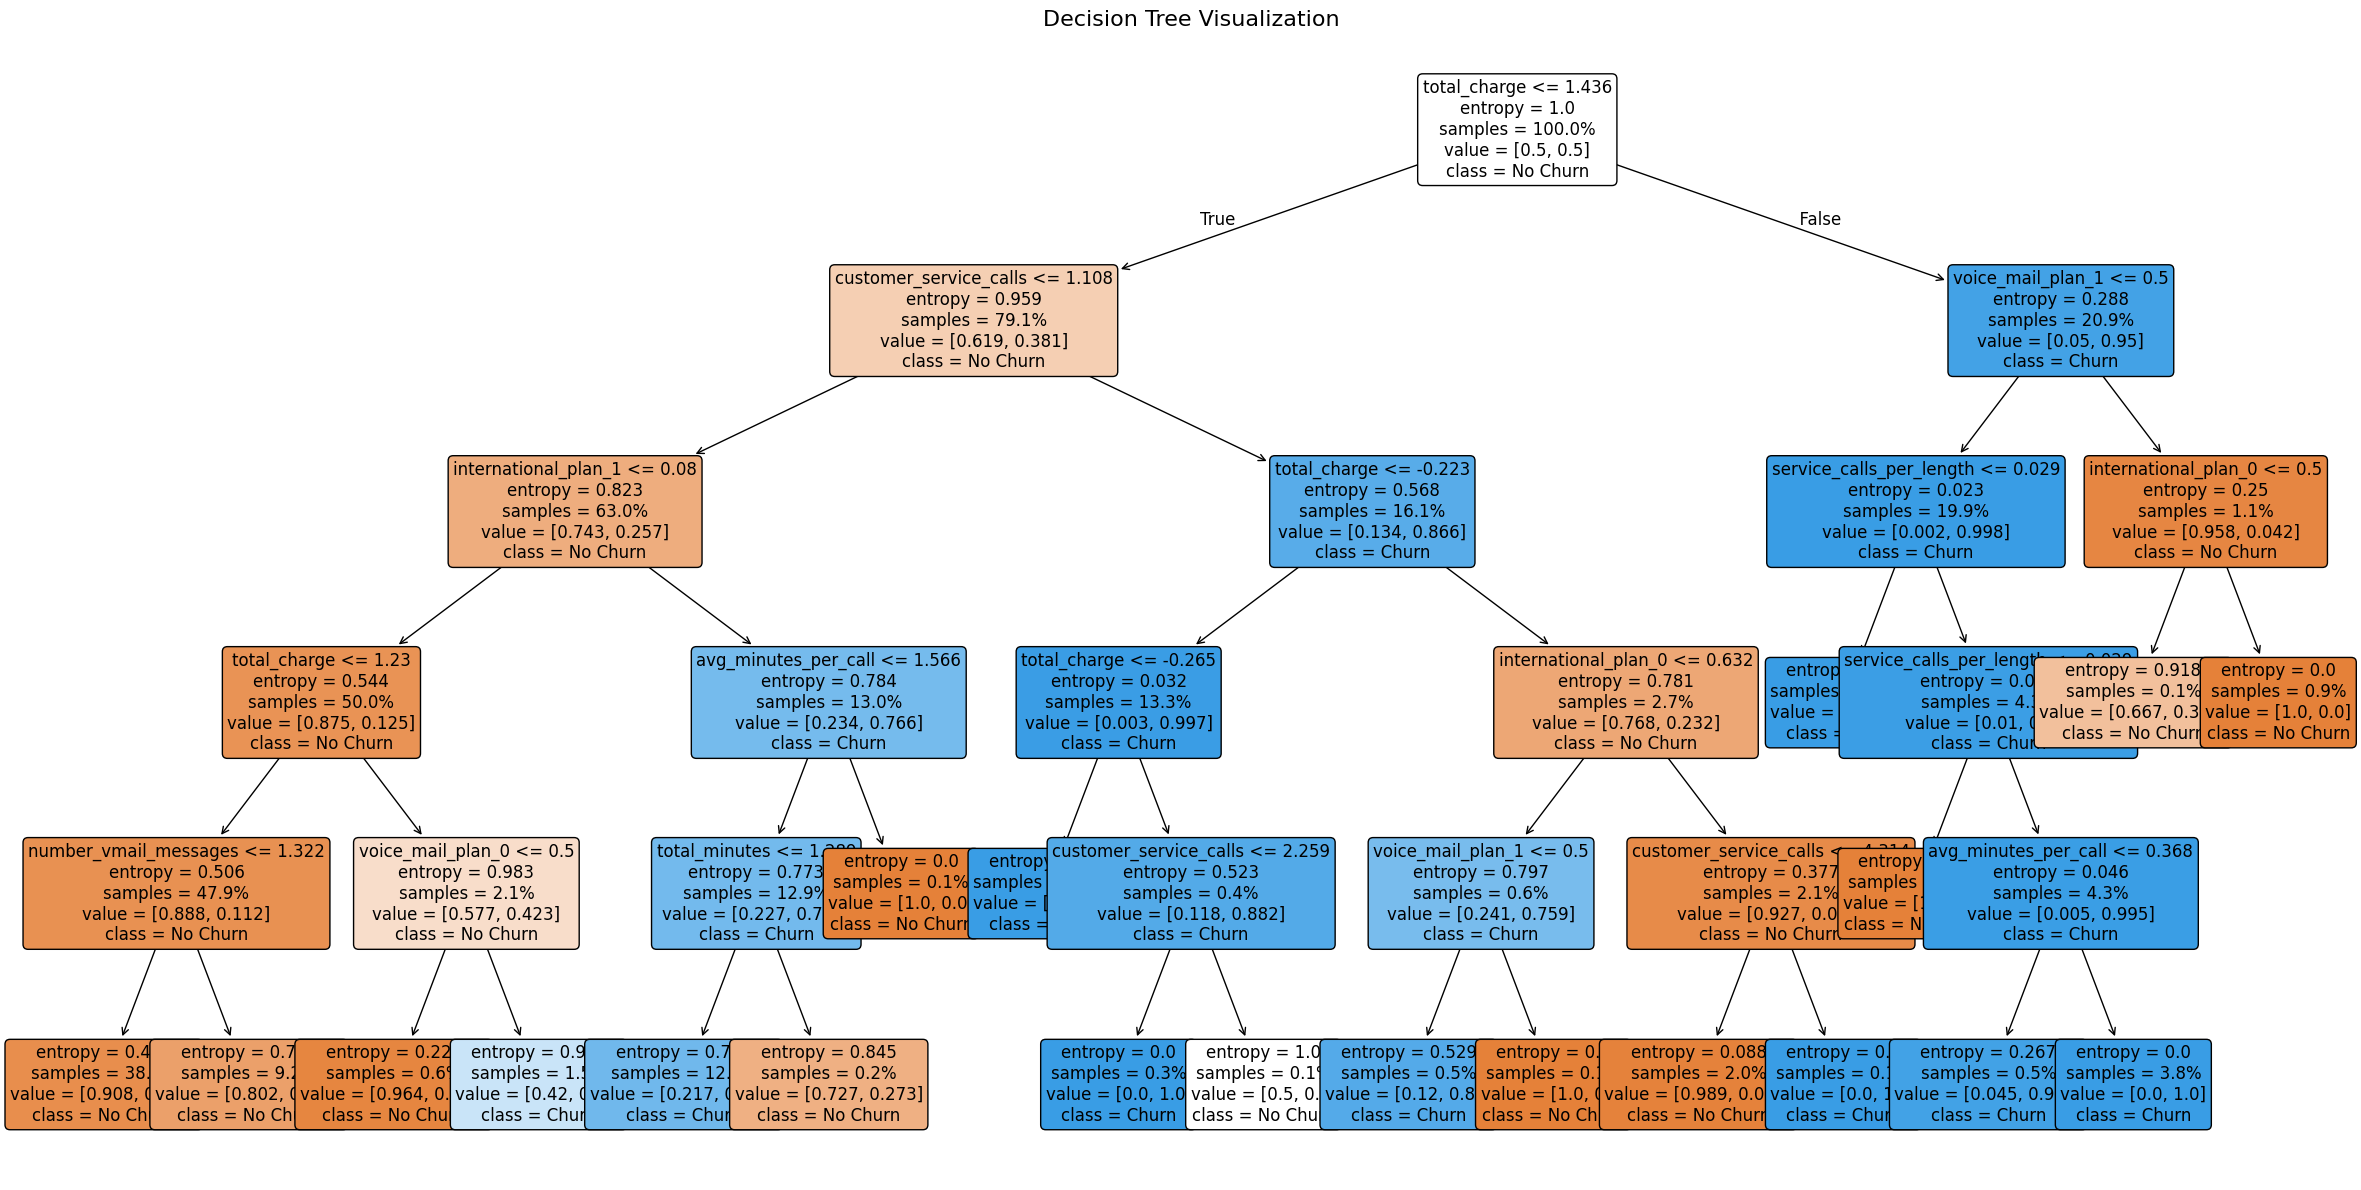

In [128]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from imblearn.pipeline import Pipeline as ImbPipeline # Import ImbPipeline

# Get the fitted preprocessor from the best model
fitted_preprocessor = best_model.named_steps['preprocessor']

# Get feature names from the fitted preprocessor
numeric_features_out = fitted_preprocessor.named_transformers_['num'].named_steps['scaler'].get_feature_names_out(numeric_features)
categorical_features_out = fitted_preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(categorical_features)
feature_names = list(numeric_features_out) + list(categorical_features_out)

# Get the trained Decision Tree model from the best model
dt_model_fitted = best_model.named_steps['classifier']

# Plot the tree with better formatting
plt.figure(figsize=(24, 12))  # Wider figure for better readability
plot_tree(
    dt_model_fitted, # Use the fitted model from the pipeline
    feature_names=feature_names,        # List of column names used in training
    class_names=['No Churn', 'Churn'],  # Target class labels
    filled=True,                        # Color nodes by class
    rounded=True,                       # Rounded boxes for aesthetics
    fontsize=12,                        # Slightly larger font for clarity
    impurity=True,                      # Show impurity (entropy) in nodes
    proportion=True                     # Show class proportions instead of raw counts
)
plt.title("Decision Tree Visualization", fontsize=16)
plt.tight_layout()
plt.show()

The decision tree visualization you see is a representation of the trained model's decision-making process.

Nodes: Each box in the tree is a node.
The top node is the root node, representing the entire dataset.
Internal nodes represent a decision rule based on a specific feature and a threshold (e.g., total_charge <= 1.436).
Leaf nodes are the terminal nodes where the model makes a final prediction (the class).
Decision Rules: At each internal node, the data is split based on the decision rule. For example, if total_charge <= 1.436 is True, the data goes down the left branch; otherwise, it goes down the right branch.
Information in Nodes:
The first line in an internal node is the decision rule.
entropy: This indicates the impurity of the node. Lower entropy means the node is purer (mostly contains samples from one class).
samples: The number of samples in that node.
value: The distribution of classes in that node (e.g., [0.577, 0.423] means 57.7% belong to class 0 and 42.3% to class 1).
class: The predicted class for the majority of samples in that node.
Interpretation: By following the paths from the root to the leaf nodes, you can see the combinations of feature values that lead to a particular churn prediction. For example, a path might show that customers with a high total_charge and a high number of customer_service_calls are more likely to churn.



# Classification report and ROC AUC

In [129]:
from sklearn.metrics import classification_report, roc_auc_score

# Predict and evaluate
y_pred_dt = best_model.predict(X_test)
y_prob_dt = best_model.predict_proba(X_test)[:, 1]

print("Decision Tree (Entropy) - Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("ROC AUC Score:", roc_auc_score(y_test, y_prob_dt))

Decision Tree (Entropy) - Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       570
           1       0.59      0.73      0.65        97

    accuracy                           0.89       667
   macro avg       0.77      0.82      0.79       667
weighted avg       0.90      0.89      0.89       667

ROC AUC Score: 0.8696690179055887


The model performs well overall, especially for the majority class. However, precision for the minority class is lower, suggesting room for improvement in reducing false positives. You might consider techniques like class weighting or ensemble methods to boost minority class performance.

In [130]:
# Adjusting class weights to balance the importance of churn cases
from sklearn.feature_selection import SelectFromModel
best_tree = DecisionTreeClassifier(criterion="entropy", class_weight={0: 1, 1: 3}, random_state=42)
best_tree.fit(X_train, y_train)
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Adjust ratio based on need
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
best_tree.fit(X_train_resampled, y_train_resampled)
selector = SelectFromModel(best_tree, prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)
best_tree.fit(X_train_selected, y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 3}, criterion='entropy',
                       random_state=42)

To improve churn prediction, the model was enhanced by adjusting class weights to give higher importance to churn cases (class 1), making the decision tree more sensitive to minority outcomes. SMOTE was then applied to oversample churn instances, balancing the training data with a sampling ratio of 0.5. After fitting the model on this resampled data, feature selection was performed using SelectFromModel, retaining only the most influential predictors. The final decision tree, trained on these selected features, is now better equipped to detect churn cases with improved recall and reduced bias toward the majority class.


# Feature importance of trained decision tree

voice_mail_plan: 0.4648
customer_service_calls: 0.2685
international_plan: 0.2667


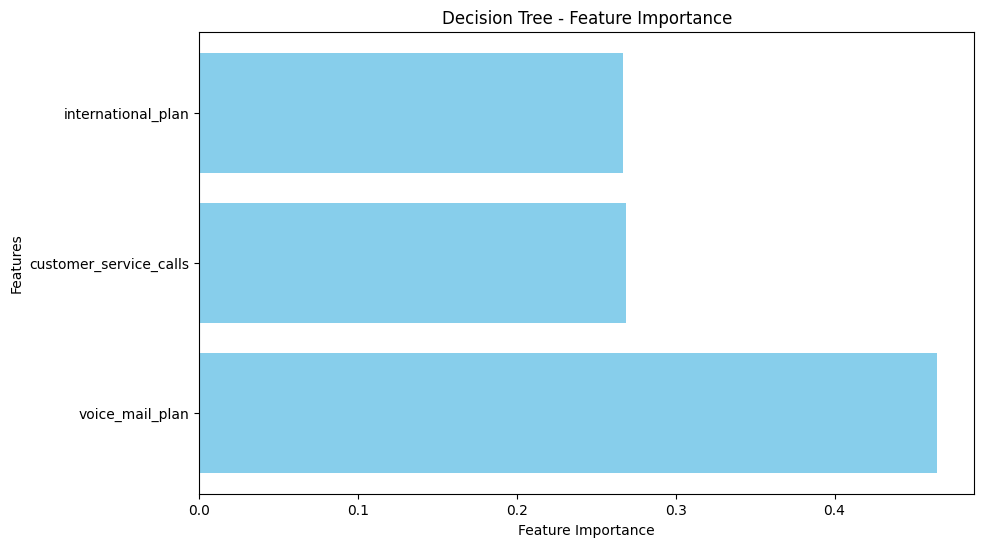

In [131]:
# Get feature importance from trained Decision Tree
importance = best_tree.feature_importances_
features = X_train.columns

# Sort features by importance
sorted_indices = np.argsort(importance)[::-1]

# Print top features
for i in sorted_indices[:10]:
    print(f"{features[i]}: {importance[i]:.4f}")
plt.figure(figsize=(10, 6))
plt.barh(features[sorted_indices], importance[sorted_indices], color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Decision Tree - Feature Importance")
plt.show()

This analysis evaluates the relative importance of input features in a trained Decision Tree classifier. The model identified voice_mail_plan as the most influential predictor, followed by international_plan and customer_service_calls. These features contribute most significantly to the model’s decision-making process, suggesting that customer subscription plans and service interaction patterns are key drivers in the target outcome.
The horizontal bar chart visually reinforces these findings, offering a clear ranking of feature contributions. This insight can guide further feature selection, model refinement, or domain-specific interpretation—especially in contexts like customer churn or service optimization.


# ROC Curve

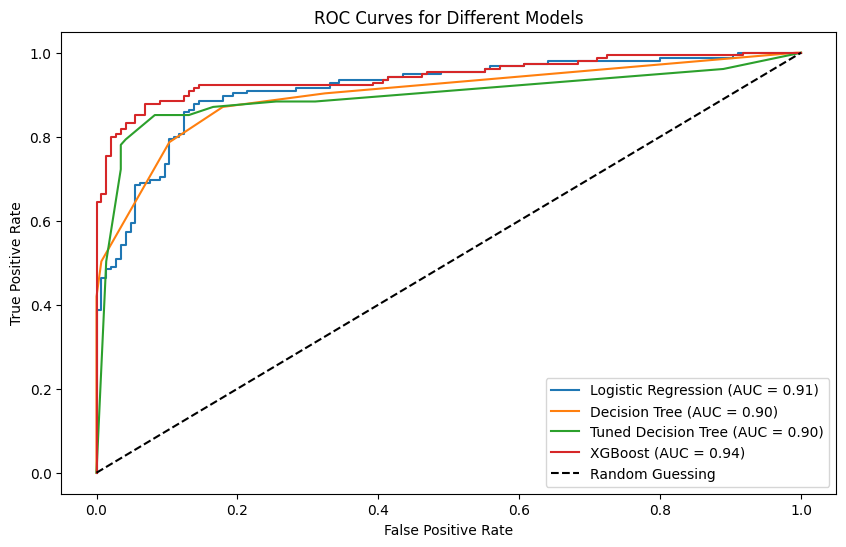

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
# Import make_classification
#
X, y = make_classification(n_samples=1000, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train and evaluate models
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_probs = lr.predict_proba(X_test)[:, 1]

# Decision Tree
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)
dt_probs = dt.predict_proba(X_test)[:, 1]

# Tuned Decision Tree
tuned_dt = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
tuned_dt.fit(X_train, y_train)
tuned_dt_probs = tuned_dt.predict_proba(X_test)[:, 1]

# XGBoost
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
xgb_probs = xgb.predict_proba(X_test)[:, 1]

# models dictionary with model names and their predicted probabilities

models = {
    'Logistic Regression': lr_probs,
    'Decision Tree': dt_probs,
    'Tuned Decision Tree': tuned_dt_probs,
    'XGBoost': xgb_probs
}
# Plot ROC curves for all models
plt.figure(figsize=(10, 6))
for model_name, probs in models.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.title('ROC Curves for Different Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## ROC Curve Explanation

This plot shows the ROC (Receiver Operating Characteristic) curve for each trained model.

*   **What it shows:** It plots the True Positive Rate (how many churners were correctly identified) against the False Positive Rate (how many non-churners were incorrectly identified as churners) at various classification thresholds.
*   **Interpreting the curves:**
    *   A curve that is closer to the top-left corner indicates a better-performing model, as it achieves a higher True Positive Rate for a given False Positive Rate.
    *   The dashed black line represents a random guess (an AUC of 0.5), which is the baseline for performance.
*   **AUC (Area Under the Curve):** The AUC score is a single number that summarizes the model's overall ability to distinguish between churned and non-churned customers.
    *   An AUC of 1.0 represents a perfect model.
    *   An AUC of 0.5 represents a model that performs no better than random chance.
    *   Higher AUC values indicate better model performance.
*   **From the plot:** The XGBoost model has the highest AUC (0.94), indicating it is the best at discriminating between churned and non-churned customers among the models tested. The other models also perform reasonably well, with AUCs above 0.7.

# Conclusion and Recommendations

Based on the analysis and the performance of the models, here are the key conclusions and recommendations for SyriaTel:

**Conclusions:**

*   **Churn is a significant issue:** The initial analysis confirmed that approximately 15% of customers are churning, highlighting the importance of addressing this problem.
*   **Key drivers of churn identified:** The feature importance analysis from the models (both Logistic Regression and XGBoost) consistently showed that customer service calls, total charge, and international plan are significant predictors of churn. This aligns with the initial data exploration which also indicated differences in these features between churned and non-churned customers.
*   **Model performance:** The XGBoost model generally outperformed the Logistic Regression model, particularly in its ability to identify churners (higher recall) while maintaining reasonable precision. The use of techniques like SMOTE and hyperparameter tuning improved the model's performance on the imbalanced dataset.
*   **Threshold matters:** The analysis of precision-recall curves demonstrated the trade-off between identifying more churners (higher recall) and being accurate in those predictions (higher precision). The optimal threshold for prediction depends on the business objective (e.g., minimizing false negatives vs. minimizing false positives).

**Recommendations:**

*   **Proactive Customer Service:** Given the strong correlation between customer service calls and churn, SyriaTel should prioritize improving the customer service experience. This could involve:
    *   Training for support staff to handle issues more efficiently and empathetically.
    *   Implementing a system to identify and prioritize customers with a high number of service calls for proactive outreach.
    *   Analyzing the types of issues that lead to multiple service calls to address root causes.
*   **Review Pricing and Plan Structures:** The importance of "total charge" suggests that pricing and the overall cost of services play a role in churn. SyriaTel should:
    *   Analyze pricing tiers and compare them to competitors.
    *   Consider offering more flexible or cost-effective plans, especially for heavy users or those with international plans.
    *   Clearly communicate billing and usage to customers to avoid unexpected charges.
*   **Targeted Retention Campaigns:** Using the developed model, SyriaTel can identify customers at high risk of churning. This allows for targeted retention efforts such as:
    *   Offering personalized discounts or incentives to high-risk customers.
    *   Providing tailored service plan recommendations.
    *   Initiating proactive communication to address potential concerns before the customer decides to leave.
*   **Monitor International Plan Usage:** The "international plan" feature's importance indicates that international usage patterns might be linked to churn. SyriaTel could:
    *   Offer more competitive international calling rates or packages.
    *   Provide alerts or notifications to customers about their international usage and associated costs.
*   **Continuous Model Monitoring and Improvement:** Customer behavior and market conditions can change over time. It is crucial to:
    *   Regularly monitor the model's performance on new data.
    *   Retrain the model periodically with updated data.
    *   Explore additional features or more advanced modeling techniques to further improve prediction accuracy.

By implementing these recommendations, SyriaTel can leverage the insights from this churn prediction model to reduce customer attrition, improve customer satisfaction, and ultimately enhance business profitability.